In [26]:
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os

In [27]:
# buscar los archivos csv
result_files = glob.glob('./results/*.csv', recursive=True)

# Read all files into a dictionary of dataframes
dataframes = {}
for file_path in result_files:
    # Extract filename without extension for the key
    filename = os.path.splitext(os.path.basename(file_path))[0]
    dataframes[filename] = pd.read_csv(file_path)

# Display available dataframes

for name in dataframes.keys():
    print(f"- {name}: shape {dataframes[name].shape}")

# Access individual dataframes like: dataframes['maze1']

- test1: shape (3, 10)
- test2: shape (3, 10)


In [28]:
# combinar dataframes
combined_df = pd.concat(dataframes.values(), ignore_index=True)

print(f"Dataframe combinado: {combined_df.shape}")
print("\nPrimeras 5 filas:")
combined_df.head(15)

Dataframe combinado: (6, 10)

Primeras 5 filas:


,algorithm,maze_size,walls,goals,crazy_value,time_ms,peak_memory_kb,solution_length,timeout_reached,run
0,A*,50,875,1,0.10,6.120,36.047,39,False,0
1,GA Fast,50,875,1,0.10,40852.468,1898.309,-1,True,0
2,GA Optimal,50,875,1,0.10,41652.405,1923.041,-1,True,0
3,A*,67,1571,1,0.05,11.370,78.156,85,False,0
4,GA Fast,67,1571,1,0.05,40395.704,2046.360,-1,True,0
5,GA Optimal,67,1571,1,0.05,44125.268,3950.089,-1,True,0


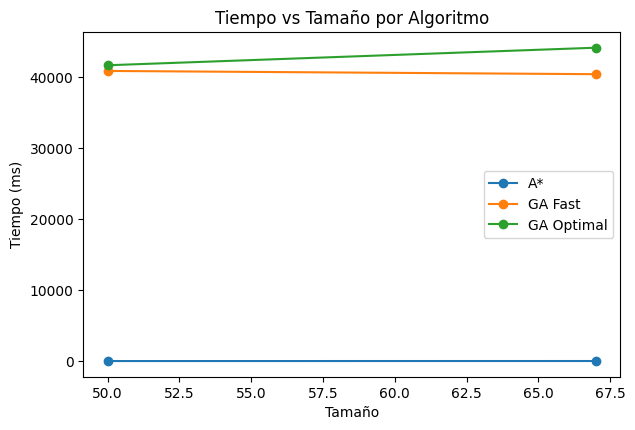

In [ ]:
# Grafico con tamaño de laberinto variable

# df_size = pd.read_csv('./results/size_var.csv')

df_size = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_size['algorithm'].unique():
    data = df_size[df_size['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('maze_size')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)
plt.title('Tiempo vs Tamaño de Laberinto por Algoritmo')
plt.xlabel('Tamaño')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()

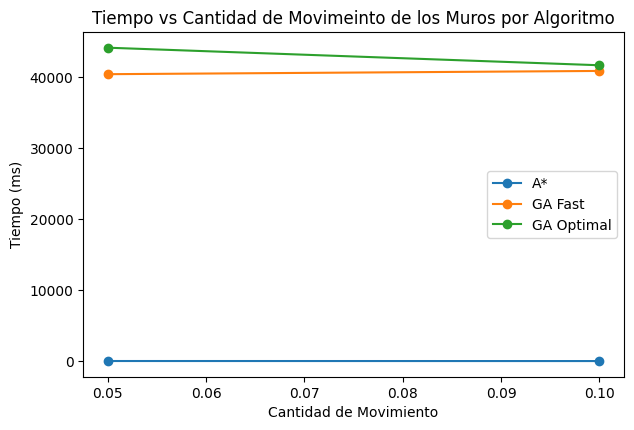

In [ ]:
# Grafico con crazy value variable

# df_crazy = df_goals = pd.read_csv('./results/crazy_var.csv')

df_crazy = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_crazy['algorithm'].unique():
    data = df_crazy[df_crazy['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('crazy_value')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Cantidad de Movimiento de los Muros por Algoritmo')
plt.xlabel('Cantidad de Movimiento')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()

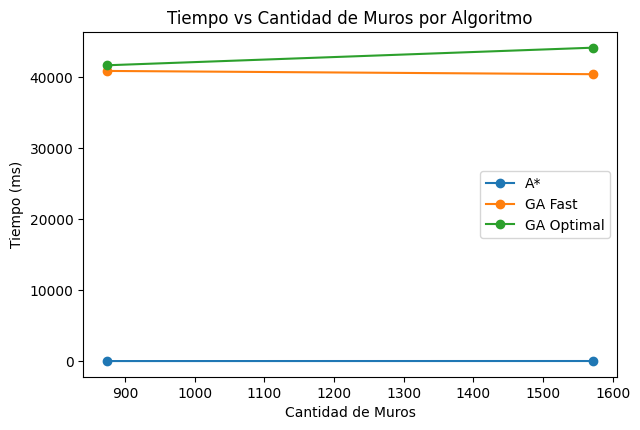

In [52]:
# Grafico con cantidad de muros variable

# df_walls = pd.read_csv('./results/walls_var.csv')

df_walls = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_walls['algorithm'].unique():
    data = df_walls[df_walls['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('walls')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Cantidad de Muros por Algoritmo')
plt.xlabel('Cantidad de Muros')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()

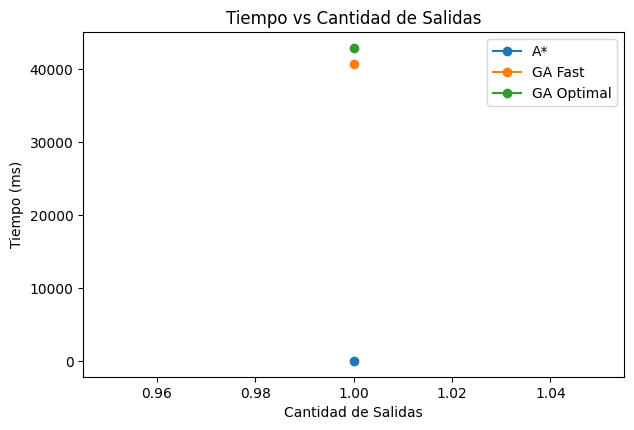

In [53]:
# Grafico con cantidad de metas variable

# df_goals = pd.read_csv('./results/goal_var.csv')

df_goals = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_goals['algorithm'].unique():
    data = df_goals[df_goals['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('goals')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Cantidad de Salidas')
plt.xlabel('Cantidad de Salidas')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()